# Algoritmos Genéticos
> O algoritmo completo se encontra no final do notebook, várias funções são criados no caminho.

### Gabriel Negreiros Lima

1. Implementar um algoritmo genético para resolver o problema de maximização da função Alpine 2

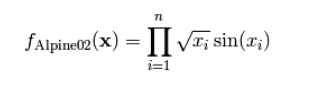

Nesta equação, n representa o número de dimensões e x_i pertencente a [0,10] para i = 1, ..., n. 

## Representação
Neste trabalho teremos n = 2, portanto:

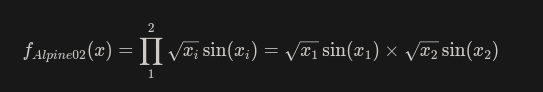

O Máximo Global da função é igual a `f(x^*)=2.808^n => f(x1,x2)=7.88`.

## Função *fitness*
A função de aptidão utilizada será `f_fit(x) = f(x) + 7.88`, que em módulo é o máximo e mínimo desta função, e desta forma não teremos resultados negativos na função *fitness*. Neste trabalho avaliaremos com 3 casas decimais.

In [2]:
import math
from random import randint
import numpy as np

def f_alpine02(x, y):
    return math.sqrt(x)*math.sin(x) * math.sqrt(y)*math.sin(y)

def f_fit(x, y):
    return f_alpine02(x, y) + 7.88

MAX_ALPINE = f_fit(7.917, 7.917) # 7.88 * 2
MAX_ALPINE

15.765600701977823

## População inicial

In [34]:
NUMBER_OF_INDIVIDUALS = 20
NUMBER_OF_PARENTS = int(NUMBER_OF_INDIVIDUALS/2)

x_s = [np.random.uniform(0,10) for _ in range(0,NUMBER_OF_INDIVIDUALS)]
y_s = [np.random.uniform(0,10) for _ in range(0,NUMBER_OF_INDIVIDUALS)]
population = np.zeros((NUMBER_OF_INDIVIDUALS,2))

for index, element in enumerate(x_s):
    x_s[index] = round(x_s[index], 3)
    y_s[index] = round(y_s[index], 3)
    fit = f_fit(x_s[index], y_s[index])
    
    population[index][0] = x_s[index]
    population[index][1] = y_s[index]

population

array([[5.802, 0.123],
       [3.675, 5.066],
       [4.294, 8.036],
       [6.468, 6.389],
       [8.086, 7.365],
       [6.613, 5.717],
       [5.83 , 2.814],
       [5.88 , 4.708],
       [8.661, 3.49 ],
       [6.73 , 4.889],
       [9.476, 3.933],
       [6.981, 3.467],
       [1.171, 1.344],
       [8.451, 5.892],
       [0.477, 3.846],
       [6.916, 3.307],
       [7.113, 5.083],
       [8.629, 3.956],
       [4.584, 3.152],
       [7.765, 2.978]])

## Seleção: roleta
Para fazer a seleção da roleta, iremos utilizar a função `f_fit` para gerar a roleta:

In [51]:
X_POS = 0 
Y_POS = 1

def roleta(population):
    sum_fitness = 0
    sum_by_individual = []
    temp = np.array([])                       # temporary to save the fitness
    number_of_rows, _ = population.shape      # population size
    fitnesses = np.zeros((number_of_rows,2))  # matrix with position and fitness of each one
    position = 0
    
    # saves all fitnesses and position of the individual
    for i in population:
        temp = f_fit(i[X_POS], i[Y_POS]) 
        fitnesses[position][0] = position
        fitnesses[position][1] = temp
        position += 1
        
    for fit in fitnesses:
        sum_fitness += fit[1]  
        sum_by_individual.append([
            fit[0],
            sum_fitness
        ])
        #print(fit[1], sum_fitness)
            
    sum_fitness = int(sum_fitness * 1000)  # make it a integer to ease
    rand_value = randint(0, sum_fitness)   # randomizing
    
    #print(sum_by_individual)
    rand_value = float(rand_value / 1000)   # make it back to float
    sum_fitness = float(sum_fitness / 1000)
    
    # find the first element that has fitness sum greater than random
    #print(f"sum_fitness_total: {sum_fitness}")
    #print(f"rand_value: {rand_value}")
    for ind_with_sum  in sum_by_individual:
        if ind_with_sum[1] >= rand_value: 
            #print(f"index of the individual and fitness sum: {ind_with_sum}")
            #print(f"individual: {population[int(ind_with_sum[0])]}")
            return population[int(ind_with_sum[0])]
        
        
roleta(population)

array([0.477, 3.846])

Agora que temos a função roleta, podemos selecionar os pais da próxima geração. Para uma população definida na variável NUMBER_OF_INDIVIDUALS, elegemos a metade de casais que serão os pais, e então estes serão passados para o cruzamento.

## Operadores Genéticos
### Crossover aritmético
Dados dois indivíduos, constituiremos um novo par de indivíduos

In [50]:
def crossover(parent_a, parent_b):
    
    a_x = -1
    a_y = -1
    b_x = -1
    b_y = -1
    
    while a_x < 0 or a_y < 0 or b_x < 0 or b_y < 0 or a_x > 10.0 or a_y > 10.0 or b_x > 10.0 or b_y > 10.0:
        alpha = randint(0,100)/100
        Pa_x = parent_a[0]
        Pa_y = parent_a[1]
        Pb_x = parent_b[0]
        Pb_y = parent_b[1]
        
        a_x = (alpha * Pa_x + (1 - alpha)* Pb_x)
        a_y = (alpha * Pa_y + (1 - alpha)* Pb_y)

        b_x = (alpha * Pb_x + (1 - alpha)* Pa_x)
        b_y = (alpha * Pb_y + (1 - alpha)* Pa_y)
    
    children_a = [a_x, a_y]
    children_b = [b_x, b_y]
    
    return (children_a, children_b)

children_a, children_b = crossover(population[0], population[1])
print(children_a, children_b)

[6.916, 3.3070000000000004] [6.916, 3.3070000000000004]


### Mutação Gaussiana
Dado um indivíduo, realizar uma mudança local com um ajuste aleatório em ambas as posições:

In [32]:
#
#
#
#  TROCAR: a mutação é feita em todos os genes da população
#  
#
#
#



def mutation(individual): 
    max_range_value = 2
    
    signal = randint(0, 3)  # 0 = + + | 1 = + - | 2 = - + | 3 = - - 
    delta_x = randint(0, max_range_value*1000)/1000 # same logic from roleta
    delta_y = randint(0, max_range_value*1000)/1000 
    
    probability = 1   # 0.5% 
    decisor = randint(1, 1000)
    
    if decisor <= probability:
        
        # signal choise
        if signal == 0:
            new_x = individual[0]+delta_x
            new_y = individual[1]+delta_y
        elif signal == 1:
            new_x = individual[0]+delta_x
            new_y = individual[1]-delta_y
        elif signal == 2:
            new_x = individual[0]-delta_x
            new_y = individual[1]+delta_y
        elif signal == 3:
            new_x = individual[0]-delta_x
            new_y = individual[1]-delta_y
        
        # boundaries
        if new_x > 10.0:
            new_x = 10.0
        elif new_x < 0:
            new_x = 0
        
        if new_y > 10.0:
            new_y = 10.0
        elif new_y < 0:
            new_y = 0
            
        return [round(new_x, 3), round(new_y, 3)]
    
    return individual

mutated = mutation(population[4])
print(population[4], mutated)

[1.032 9.665] [1.032 9.665]


## Mais algumas funções auxiliares
### Fitnesses para plots
Dada uma população, precisaremos do maior fitness, do menor, e do fitness médio para criar o gráfico de convergência.

In [52]:
def max_fitness(population):
    biggest = 0
    
    for individual in population:
        fit = f_fit(individual[0], individual[1])
        
        if fit >= biggest: 
            chosen_x = individual[0]
            chosen_y = individual[1]
            biggest = fit
    
    return ([chosen_x, chosen_y], biggest)

max_fitness(population)

([1.171, 1.344], 9.00599759701635)

In [53]:
def mean_fitness(population):
    sum_value = 0.0
    
    for individual in population:
        fit = f_fit(individual[0], individual[1])
        sum_value = sum_value + fit
        
    return sum_value / NUMBER_OF_INDIVIDUALS
    
mean_fitness(population)

6.661184546180989

In [54]:
def min_fitness(population):
    minor = 10.0
    
    for individual in population:
        fit = f_fit(individual[0], individual[1])
        
        if fit <= minor:
            chosen_x = individual[0]
            chosen_y = individual[1]
            minor = fit
    
    return ([chosen_x, chosen_y], minor)

min_fitness(population)

([7.69885, 4.62535], 2.0065785570261765)

## Algoritmo completo
Agora com as funções necessárias, montamos o algoritmo.

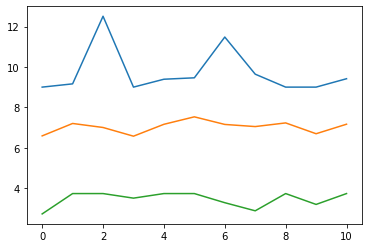

In [60]:
from matplotlib import pyplot as plt

max_gens = 10
actual_gen = 0 
difference = 10000
current_pop = population
new_gen = population
vector_best = []
vector_mean = []
vector_worst = []
vector_gen = []
crossover_ratio = 0.7

while actual_gen <= max_gens and difference > 0.01:
    
    # Choose the best individual
    best_ind, best_fit = max_fitness(current_pop)
    vector_best.append(best_fit)
    
    mean_fit = mean_fitness(current_pop)
    vector_mean.append(mean_fit)
    
    worst_ind, worst_fit = min_fitness(current_pop)
    vector_worst.append(worst_fit)
    
    vector_gen.append(actual_gen) 
    counter = 0 
    
    for index in range(0, NUMBER_OF_PARENTS, 2):
        # selection
        parent_a = roleta(current_pop)
        parent_b = roleta(current_pop)
        #print(parent_a, parent_b, "\n-----")
        
        cross_rand = randint(0,100)/100
        if cross_rand <= 0.7:
            # crossover
            children_a, children_b = crossover(parent_a, parent_b)
            #print(children_a, children_b, "\n")

            # mutation (0.1%)
            #children_a = mutation(children_a)
            #children_b = mutation(children_b)

            new_gen[index] = children_a
            new_gen[index+1] = children_b

            #print(f"C_a: {children_a}, C_a: {children_b}")
        else:
            new_gen[index] = parent_a
            new_gen[index+1] = parent_b
    
    #print(new_gen, "\n\n\n\n\n")
    #input('Press enter to continue: ')
    current_pop = new_gen
    difference = abs(best_fit - f_fit(7.917, 7.917))
    #print(f"melhor individuo: {best_ind}, fitness: {best_fit},\nfitness otimo: {f_fit(7.917, 7.917)}, geracao atual: {actual_gen}\n\n")
    actual_gen = actual_gen + 1

    
plt.plot(vector_gen, vector_best, label='best')
plt.plot(vector_gen, vector_mean, label='mean')
plt.plot(vector_gen, vector_worst, label='worst')
#plt.xlabel("Generations")
#plt.ylabel("Fitness")
plt.show()

# ToDo
- Plotar gráfico de convergência
  - Fitness do melhor
  - Fitness médio da população
  - Fitness do pior elemento